In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions , decision_regions
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.svm import SVC 

In [4]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning Projects\\Location_based_analysis\\data\\Dataset .csv')

In [6]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [28]:
df.dropna(axis=1 , how="any")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [32]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [42]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [45]:
shapefile_path = "C:\\Users\\HP\\Downloads\\ne_10m_admin_0_countries"

In [48]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

<Axes: >

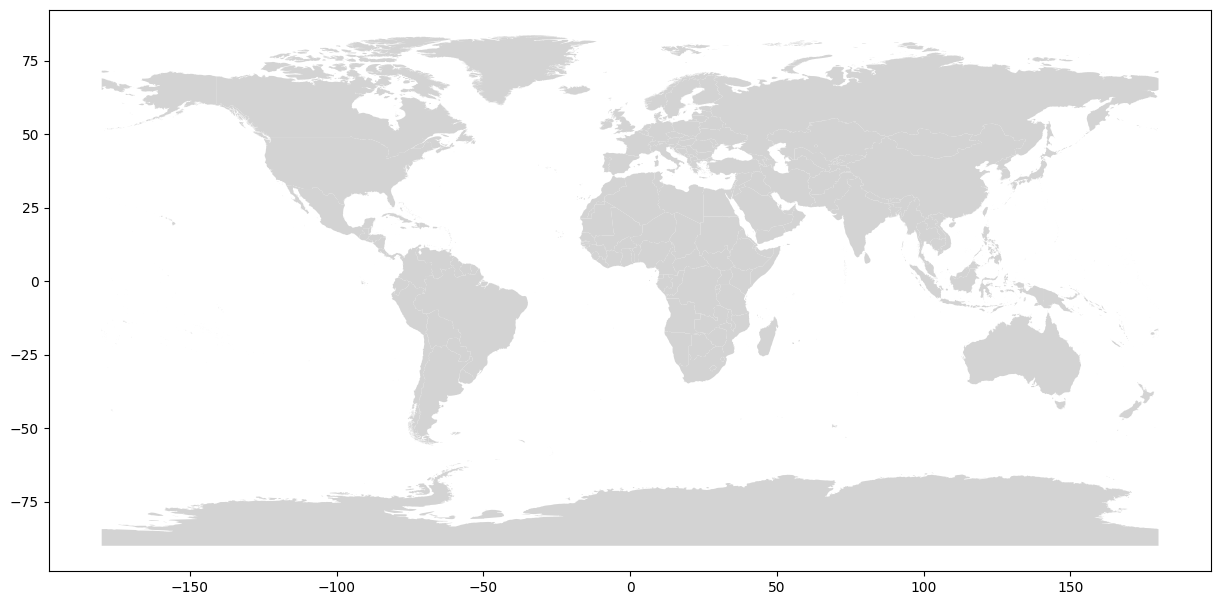

In [49]:
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
world = gpd.read_file(shapefile_path)
world.plot(ax=ax, color='lightgrey')


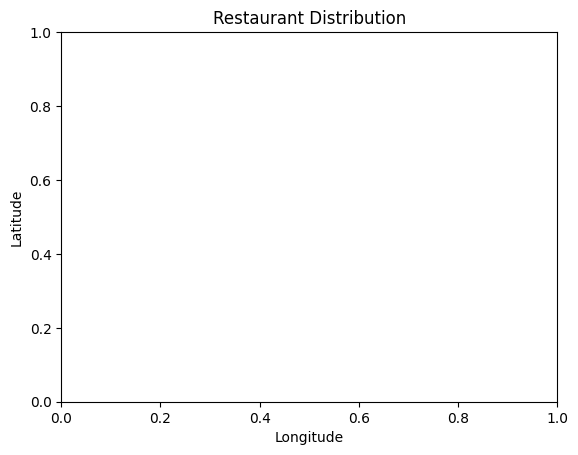

In [50]:
# Plot the points
geo_df.plot(ax=ax, markersize=10, color='blue', alpha=0.5)
plt.title('Restaurant Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [51]:
import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Add points to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']} ({row['City']})",
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)


In [54]:
# Save the map as an HTML file
m.save('data/restaurant_distribution_map.html')

In [56]:
import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

# Add points to the map
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']} ({row['City']})",
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)


In [57]:
# Save the map as an HTML file
map_path = 'data/restaurant_distribution_map.html'
m.save(map_path)

In [58]:
map_path

'data/restaurant_distribution_map.html'

In [59]:
# Group by City and calculate the number of restaurants
city_group = df.groupby('City').size().reset_index(name='Restaurant Count').sort_values(by='Restaurant Count', ascending=False)


In [60]:
# Display the top 10 cities with the most restaurants
city_group.head(10)

,City,Restaurant Count
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
17,Bhubaneshwar,21
69,Lucknow,21
5,Amritsar,21
2,Ahmedabad,21
51,Guwahati,21


In [62]:
# Group by City and calculate the number of restaurants
city_group = df.groupby('City').size().reset_index(name='Restaurant Count').sort_values(by='Restaurant Count', ascending=False)

# Display the top 10 cities with the most restaurants
print(city_group.head(10))

            City  Restaurant Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
17  Bhubaneshwar                21
69       Lucknow                21
5       Amritsar                21
2      Ahmedabad                21
51      Guwahati                21


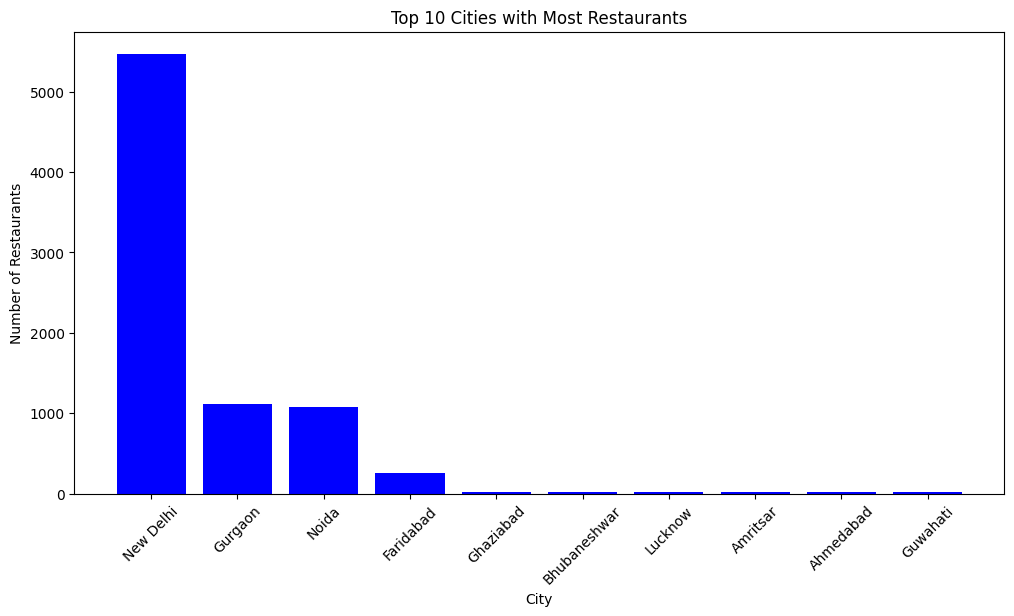

In [63]:
import matplotlib.pyplot as plt

# Plot the top 10 cities with the most restaurants
top_cities = city_group.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_cities['City'], top_cities['Restaurant Count'], color='blue')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with Most Restaurants')
plt.xticks(rotation=45)
plt.show()


In [64]:
# Calculate the average ratings by city
average_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index(name='Average Rating').sort_values(by='Average Rating', ascending=False)

# Display the top 10 cities with the highest average ratings
print(average_ratings.head(10))


                 City  Average Rating
56         Inner City        4.900000
107       Quezon City        4.800000
73        Makati City        4.650000
95         Pasig City        4.633333
75   Mandaluyong City        4.625000
15         Beechworth        4.600000
67             London        4.535000
123       Taguig City        4.525000
122     Tagaytay City        4.500000
116      Secunderabad        4.500000


In [71]:
# Get the most common cuisine in each city
common_cuisines = df.groupby('City')['Cuisines'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index(name='Common Cuisine')

# Display the top 10 cities with their most common cuisines
print(common_cuisines.head(10))


        City                                    Common Cuisine
0  Abu Dhabi                                          American
1       Agra                             North Indian, Mughlai
2  Ahmedabad  Cafe, American, Continental, Armenian, Fast Food
3     Albany                            Japanese, Steak, Sushi
4  Allahabad                             North Indian, Chinese
5   Amritsar                                      North Indian
6     Ankara                              Kebab, Turkish Pizza
7   Armidale                                   Bar Food, Steak
8     Athens                          American, Italian, Pizza
9   Auckland                                              Cafe


In [70]:
# Calculate the average price range by city
average_price_range = df.groupby('City')['Average Cost for two'].mean().reset_index(name='Average Cost for Two').sort_values(by='Average Cost for Two', ascending=False)

# Display the top 10 cities with the highest average price range
print(average_price_range.head(10))


                 City  Average Cost for Two
59            Jakarta         308437.500000
125         Tangerang         250000.000000
19              Bogor         160000.000000
13            Bandung         150000.000000
94         Pasay City           3333.333333
30            Colombo           2375.000000
75   Mandaluyong City           2000.000000
93          Panchkula           2000.000000
123       Taguig City           1725.000000
54          Hyderabad           1361.111111
